By default Prophet will return uncertainty intervals for the forecast yhat. There are several important assumptions behind these uncertainty intervals.

There are three sources of uncertainty in the forecast:
* uncertainty in the trend
* uncertainty in the seasonality estimates
* additional observation noise.

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

from quilt.data.examples import prophet as pdata

In [3]:
# feature eng: log scale
df = pdata.peyton_manning()
df['y'] = np.log(df['y'])

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


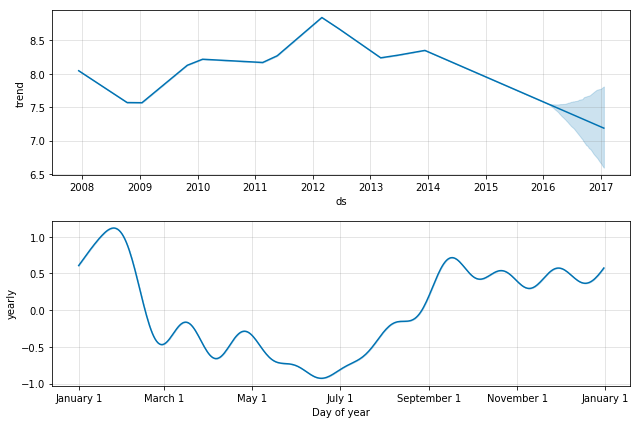

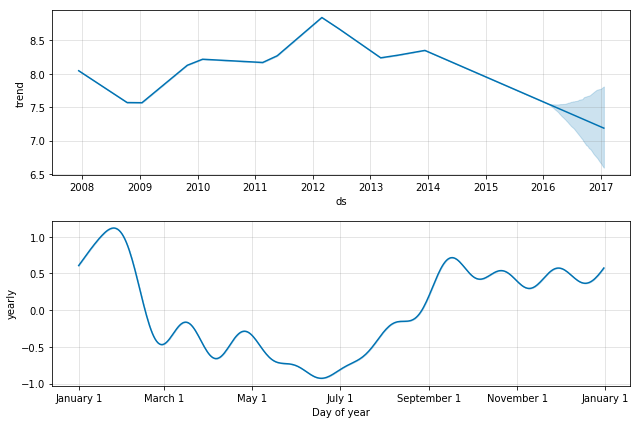

In [8]:
# empty model
m = Prophet(weekly_seasonality=False)
# add seasonality before fitting
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# fit
m.fit(df)
# future
future = m.make_future_dataframe(periods=365)
# do the forecast; widen the uncertainty interval
# The biggest source of uncertainty in the forecast is the potential for future trend changes
forecast = Prophet(interval_width=0.95).fit(df).predict(future)
# show it
m.plot_components(forecast)

# Seasonal uncertainty
By default Prophet will only return uncertainty in the trend and observation noise. To get uncertainty in seasonality, you must do full Bayesian sampling.

## This can take ~20 min on a modern laptop

In [7]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/karve/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


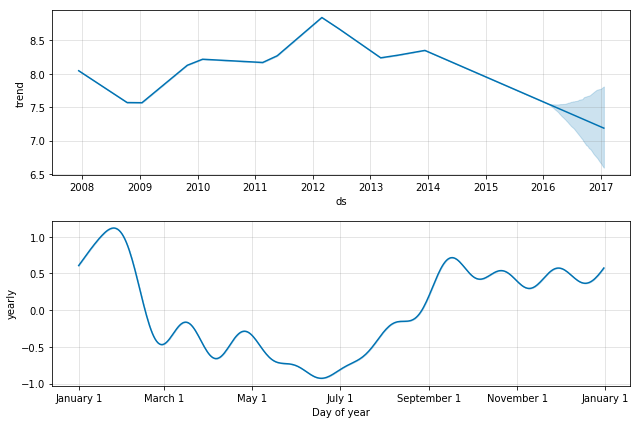

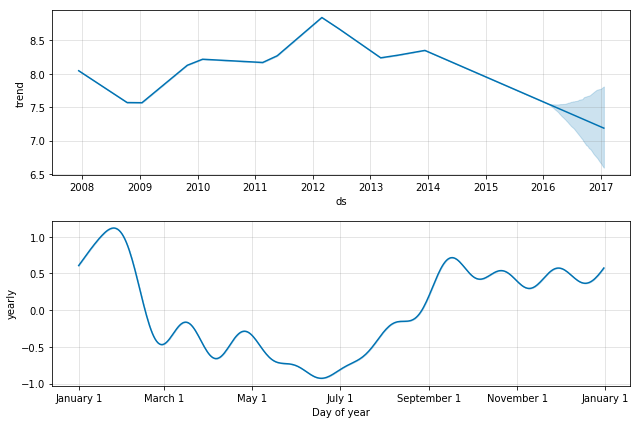

In [9]:
m.plot_components(forecast)

You can access the raw posterior predictive samples in Python using the method m.predictive_samples(future), or in R using the function predictive_samples(m, future).